# Статистика, DS-поток
## Задание S.12

**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания получат штраф.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.



**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание.**

Практика:
* Задача P1 &mdash; 50 баллов;
* Задача P2 &mdash; 100 баллов.

Задачи разных типов учитываются в разных рейтингах.

**Важность задач:**

* *высокая:* задачи P1, P2;

Задачи расставлены в том порядке, в котором их наиболее логично выполнять.

In [1]:
# Bot check

# HW_ID: ds_sp11
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from tqdm.notebook import tqdm
import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.3, palette='Set2')

---
### Задача P1.

Напишите класс, реализующий линейную регрессию и ее статистические свойства в условиях гомоскедастичности.

In [3]:
class LinearRegression:
    '''
    Класс, реализующий линейную регрессию c помощью МНК.
    '''

    def __init__(self, fit_intercept=True, alpha=0.05, feature_names=None):
        '''
        :param fit_intercept: добавлять ли смещение(константный признак)
        :param alpha: уровень значимости критерия,
                      (1-alpha): уровень доверия дов. интервала
        :param feature_names: названия признаков
        '''
        self.fit_intercept = fit_intercept
        self.alpha = alpha
        self.feature_names = feature_names

    def fit(self, X, Y):
        '''
        Функция обучения модели.

        Предполагается модель Y = X * theta + epsilon,
        где epsilon имеет норм. распр. с параметрами (0, sigma^2 * I_n).

        :param X: регрессор (матрица размера n x d),
        :param Y: отклик (матрица размера n x 1),
        '''

        self.n, self.d = X.shape
        X_copy = X
        # При необходимости добавьте константу, используйте self.fit_intercept
        if self.fit_intercept:
            X_copy = np.column_stack((np.ones(X.shape[0]), X))
            self.d += 1
        else:
            X_copy = X

        self.theta = np.linalg.inv(X_copy.T @ X_copy) @ X_copy.T @ Y
        RSS = np.sum((X_copy @ self.theta - Y) ** 2)
        self.sigma_sq = RSS / (self.n - self.d)
        T = sps.t.ppf(1 - self.alpha / 2, self.n - self.d)
        diag_main = np.sqrt(np.diagonal(np.linalg.inv(X_copy.T @ X_copy)))
        width = T * np.sqrt(self.sigma_sq) * diag_main
        self.conf_int = np.column_stack((self.theta - width, self.theta + width))
                        #<доверительные интервалы для
                        #коэффициентов (матрица размера d x 2)>
        self.t_stats = self.theta / (np.sqrt(self.sigma_sq) * diag_main)
                        #<статистики критериев о незначимости
                        #коэффициентов (вектор размера d)>
        self.t_pvalue = 2 * (1 - sps.t.cdf(np.abs(self.t_stats),
                                      self.n - self.d))
                        #<p-value критериев о незначимости
                        #коэффициентов (вектор размера d)>
        R_sq = 1 - RSS / np.sum((Y - np.sum(Y)/self.n) ** 2)
        self.f_stat = R_sq * (self.n - self.d) / ((1 - R_sq) * (self.d - 1))
                        #<статистики критерия о незначимости регрессии>
        self.f_pvalue = 1 - sps.f.cdf(self.f_stat,
                                      self.d - 1,
                                      self.n - self.d)
                        #<p-value критерия о незначимости регрессии>

        return self

    def summary(self, feature_names=None):
        '''
        Выводит таблицу с информацией для каждого коэффициента,
        в которой указана его оценка, границы дов. интервала,
        статистика критерия и значение p-value
        '''

        print(f'Линейная регрессия на {self.d} признаках и {self.n} объектах')
        print(f'Sigma: {self.sigma_sq:.6f}')

        # Напечатайте результаты F-теста
        print(f'F-statistic: {self.f_stat:.3f}, p-value: {self.f_pvalue:.6f}')


        # Далее напечатайте таблицу,
        # в которой для каждого коэффициента (по строкам)
        # будут следующие столбцы:
        # оценка, границы дов. интервала (два столбца),
        # статистика критерия, p-value
        if self.fit_intercept:
            feature_names = ['Intercept'] + (self.feature_names if self.feature_names else [f'Feature {i}' for i in range(1, self.d)])
        else:
            feature_names = self.feature_names if self.feature_names else [f'Feature {i}' for i in range(self.d)]

        
        results = pd.DataFrame({
            'Feature': feature_names,
            'Estimate': self.theta,
            'Conf. Interval Lower': self.conf_int[:, 0],
            'Conf. Interval Upper': self.conf_int[:, 1],
            't-Statistic': self.t_stats,
            'p-Value': self.t_pvalue
        })
        display(results)

    def predict(self, X, type_interval=None):
        '''
        Возвращает предсказание отклика на новых объектах X
        и опционально доверительный/предсказательный интервал.

        :param X: матрица объектов размера n x d
        :param type_interval: тип дов. интервала.
            Для этого параметра возможны три варианта:
            * None - возвратить только предсказание,
                    размер return-a: n;
            * 'confidence' - возвратить предсказание и
                доверительный интервал для среднего отклика,
                размер return-a: n x 3;
            * 'prediction' - возвратить предсказание и
                предсказательный интервал для новых объектов,
                размер return-a: n x 3.

        :return y_pred: предсказание/предсказание и дов./предсказ. инт.

        '''
        if self.fit_intercept:
            X_copy = np.column_stack((np.ones(X.shape[0]), X))
        else:
            X_copy = X
        
        y_pred = X_copy @ self.theta
        
        if type_interval is None:
            return y_pred

        main_matrix = np.linalg.inv(X_copy.T @ X_copy)
        T = sps.t.ppf(1 - self.alpha / 2, df=self.n - self.d)
    
        if type_interval == 'confidence':
            width = np.sqrt(self.sigma_sq * np.sum(X_copy @ main_matrix * X_copy, axis=1))
            return np.column_stack((y_pred, y_pred - T * width, y_pred + T * width))
        elif type_interval == 'prediction':
            width = np.sqrt(self.sigma_sq * (1 + np.sum(X_copy @ main_matrix * X_copy, axis=1)))
            return np.column_stack((y_pred, y_pred - T * width, y_pred + T * width))

Примените написанный класс для данных из задания 6 курса Введение в анализ данных и напечатайте `summary`. Предварительно разделите данные на обучающую и тестовую части, выполните необходимые преобразования признаков.

Проверку применимости критериев в данной задаче выполнять не нужно.

Скачаем данные

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
  
data = pd.read_csv('day.csv', parse_dates=['dteday'], index_col=0)
data = data[['season', 'mnth', 'holiday',
             'weekday', 'workingday', 'weathersit',
             'temp', 'atemp', 'hum', 'windspeed', 'cnt']]
train, test = train_test_split(data, test_size=1/5)

categorial_features = ['season', 'mnth', 'holiday', 
                       'weekday', 'workingday', 'weathersit']
real_features = ['temp', 'atemp', 'hum', 'windspeed']
target_feature = 'cnt'

Разделим выборку и преобразуем данные

In [5]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
train_cat = encoder.fit_transform(train[categorial_features])
test_cat = encoder.transform(test[categorial_features])

X_train = np.hstack([train[real_features], train_cat])
y_train = train[target_feature]

X_test = np.hstack([test[real_features], test_cat])
y_test = test[target_feature]

Осталось обучить модель

In [6]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

model.summary()

Линейная регрессия на 29 признаках и 584 объектах
Sigma: 189133916.097265
F-statistic: -19.403, p-value: 1.000000


,Feature,Estimate,Conf. Interval Lower,Conf. Interval Upper,t-Statistic,p-Value
0,Intercept,-10432.915741,-1.939735e+04,-1.468480e+03,-2.286014e+00,0.022629
1,Feature 1,-570644.604218,-6.218769e+05,-5.194123e+05,-2.187851e+01,0.000000
2,Feature 2,585646.600023,5.323340e+05,6.389592e+05,2.157754e+01,0.000000
3,Feature 3,-5447.590479,-1.649488e+04,5.599696e+03,-9.686013e-01,0.333166
4,Feature 4,26369.464418,1.033931e+04,4.239962e+04,3.231170e+00,0.001306
5,Feature 5,-422.046463,-7.526501e+03,6.682408e+03,-1.166879e-01,0.907150
6,Feature 6,6769.445819,-1.486377e+03,1.502527e+04,1.610605e+00,0.107834
7,Feature 7,853.563637,-6.151528e+03,7.858655e+03,2.393417e-01,0.810929
8,Feature 8,1795.744519,-3.706317e+03,7.297806e+03,6.410845e-01,0.521732
9,Feature 9,7063.142769,5.563135e+02,1.356997e+04,2.132185e+00,0.033430


Как и ожидалось, модель работает плохо - F-statistic: -19.605. В данных есть линейные зависимости, поэтому инвертирование матрицы работает плохо.

In [7]:
cond_number = np.linalg.cond(X_train.T @ X_train)
print(f"Condition number: {cond_number}")

Condition number: 4.774128406508105e+17


Для объектов из тестовой части постройте
* точечные предсказания,
* доверительный интервал для среднего таргета,
* предсказательный интервал для таргета.

Посчитайте, насколько часто истинное значение таргета попадает в построенные интервалы. Можно ли как-то проинтерпретировать это число?

Вспомогательная функция

In [8]:
def calculate_coverage(y_true, interval):
    lower_bound = interval[:, 1]
    upper_bound = interval[:, 2]
    return np.mean((y_true >= lower_bound) & (y_true <= upper_bound))

И вычисление

In [9]:
y_pred = model.predict(X_test)
y_pred_conf = model.predict(X_test, type_interval='confidence')
y_pred_pred = model.predict(X_test, type_interval='prediction')

confidence_coverage = calculate_coverage(y_test, y_pred_conf)
prediction_coverage = calculate_coverage(y_test, y_pred_pred)

print(f"Доля попаданий в доверительный интервал: {confidence_coverage:.2%}")
print(f"Доля попаданий в предсказательный интервал: {prediction_coverage:.2%}")

Доля попаданий в доверительный интервал: 78.23%
Доля попаданий в предсказательный интервал: 99.32%


Нужную долю в 95% дает только предсказательный интервал (а доверительный сильно меньше) - он учитывает шум, что и логично - модель работает плохо, существенную роль играет зашумленность. Это ожидаемый результат

Выберите один вещественный признак, для которого отвергается гипотеза о незначимости. Постройте еще раз модель, используя только этот признак, а также константный признак. Нарисуйте график, на котором отметьте
* точки выборки,
* точечные предсказания,
* доверительный и предсказательный интервалы.

Feature 1 - это температура, p-value = 4.2-12 - гипотеза о незначимости отвергается

Немного предварительных вычислений

In [10]:
X_selected =  X_train[:, 0].reshape(-1, 1)

model = LinearRegression()
model.fit(X_selected, y_train)

y_pred = model.predict(X_selected)
confidence_interval = model.predict(X_selected, type_interval='confidence')
prediction_interval = model.predict(X_selected, type_interval='prediction')

ci_lower = confidence_interval[:, 1]
ci_upper = confidence_interval[:, 2]
pi_lower = prediction_interval[:, 1]
pi_upper = prediction_interval[:, 2]

sorted_indices = np.argsort(X_selected.ravel())
X_sorted = X_selected.ravel()[sorted_indices]
ci_lower_sorted = ci_lower[sorted_indices]  
ci_upper_sorted = ci_upper[sorted_indices] 
pi_lower_sorted = pi_lower[sorted_indices]
pi_upper_sorted = pi_upper[sorted_indices]

И график

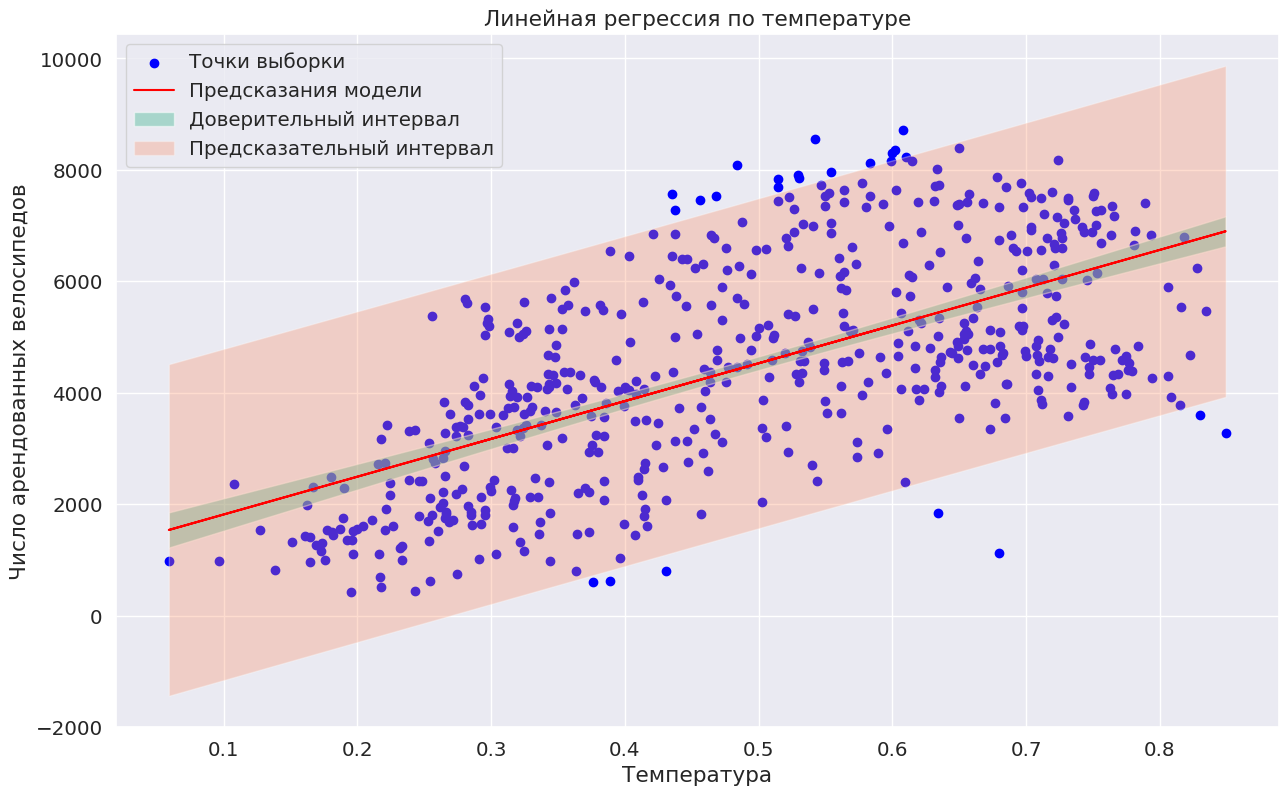

In [21]:
plt.figure(figsize=(15, 9))
plt.scatter(X_selected, y_train, color='blue', label="Точки выборки")
plt.plot(X_selected, y_pred, color='red', label="Предсказания модели")
plt.fill_between(X_sorted.ravel(), ci_lower_sorted, ci_upper_sorted,
                 alpha=0.5, label="Доверительный интервал")
plt.fill_between(X_sorted.ravel(), pi_lower_sorted, pi_upper_sorted,
                 alpha=0.3, label="Предсказательный интервал")

plt.xlabel("Температура")
plt.ylabel("Число арендованных велосипедов")
plt.legend()
plt.title(f"Линейная регрессия по температуре")
plt.show()

**Выводы:**

Как видно, предсказательный интервал учитывает зашумленность $\epsilon$, а доверительный нет - поэтому первый оказывается точнее и шире. Что и  логично, первый предсказывает возможное значение при очередном предсказании, а второй его "среднее" значение

---
### Задача P2.

Рассмотрим два признака $x_1, x_2$ и целевую метку $y$.
Будем предполагать зависимость $y(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2$.
Для проверки гипотезы о *не*значимости признака $x_2$, то есть $\mathsf{H}_0\colon \theta_2=0$, на практике широко используется $T$-критерий (например, в AB-тестировании), который мы получили в предположениях гауссовской линейной модели. Проведем его исследования.

**1.** Оцените вероятность ошибки I рода в предположениях гауссовской линейной модели, в частности, **при наличии гомоскедастичности**. Для этого повторите достаточное количество раз (не менее $10^4$) следующую процедуру и усредните результаты.
1. Сгенерируйте некоторым образом выборку размера 200 из признаков $x_1$ и $x_2$.
2. Сгенерируйте целевую метку в предположениях гауссовской линейной модели. В процедуре оценки вероятности ошибки I рода на данном этапе необходимо брать $\theta_2 = 0$, то есть генерировать данные при справедливости $\mathsf{H}_0$.
3. Примените критерий.
4. Проведя достаточное количество шагов 1-3, сделайте оценку вероятности ошибки I рода и постройте соответствующий доверительный интервал.

*Примечание.* Подобную процедуру мы уже делали в предыдущих заданиях, включая построение доверительного интервала.

*Важно:* распределение данных и шума должно быть одинаковым в каждом эксперименте!

*Совет.* Используйте `tqdm` в циклах. Производите отладку кода на малом количестве итераций.

Реализация эксперимента

In [12]:
def estimate_type_1_error(n_iterations=10000, n_samples=200, theta_0=5,
                          theta_1=2, theta_2=0, sigma=1,
                          dist_x1='normal', dist_x2='normal',
                          scale_x1=3, scale_x2=3, alpha=0.05,
                          epsilon_function=None):
    """
    Оценка вероятности ошибки I рода для теста гипотезы H0: theta_2 = 0.
    
    :param n_iterations: Количество повторений
    :param n_samples: Размер выборки
    :param theta_0: Параметр theta_0
    :param theta_1: Параметр theta_1
    :param theta_2: Параметр theta_2
    :param epsilon_function: функция для вычисления шума,
    которая принимает y и возвращает шум
    :param sigma: Стандартное отклонение шума
    :param dist_x1: Тип распределения для x1 ('normal', 'uniform')
    :param dist_x2: Тип распределения для x2 ('normal', 'uniform')
    :param scale_x1: Масштаб для распределения x1
    :param scale_x2: Масштаб для распределения x2
    :param alpha: Уровень значимости для теста гипотезы
    
    :return: Оценка вероятности ошибки I рода и доверительный интервал
    """
    rejections = 0

    for _ in tqdm(range(n_iterations)):
        if dist_x1 == 'normal':
            x1 = np.random.normal(0, sigma * scale_x1, n_samples)
        elif dist_x1 == 'uniform':
            x1 = np.random.uniform(-sigma * scale_x1,
                                   sigma * scale_x1, n_samples)
        
        if dist_x2 == 'normal':
            x2 = np.random.normal(0, sigma * scale_x2, n_samples)
        elif dist_x2 == 'uniform':
            x2 = np.random.uniform(-sigma * scale_x2,
                                   sigma * scale_x2, n_samples)
            
        y = theta_0 + theta_1 * x1 + theta_2 * x2
        
        if epsilon_function is not None:
            epsilon = epsilon_function(y)
        else:
            epsilon = np.random.normal(0, sigma, n_samples)

        y += epsilon

        X = np.column_stack((x1, x2))

        model = LinearRegression(fit_intercept=True, alpha=alpha)
        model.fit(X, y)
        
        p_value_theta_2 = model.t_pvalue[2]
        
        if p_value_theta_2 < 0.05:
            rejections += 1

    alpha_estimate = rejections * 1.0 / n_iterations

    ci_lower, ci_upper = sps.binom.interval(0.95, n_iterations, alpha_estimate)
    ci_lower = ci_lower / n_iterations
    ci_upper = ci_upper / n_iterations

    return alpha_estimate, (ci_lower, ci_upper)

Результаты могут сильно зависеть от того, как были сгенерированы данные для эксперимента. Для надежности повторите эксперимент, как-либо иначе сгенерировав признаки. Например, для генерации можно взять другое распределение признаков.

In [13]:
from IPython.display import clear_output

experiment_params = [
    {'theta_1': 5, 'dist_1': 'normal', 'dist_2': 'normal', 'scale_1': 3},
    {'theta_1': 10, 'dist_1': 'normal', 'dist_2': 'normal', 'scale_1': 2},
    {'theta_1': 15, 'dist_1': 'uniform', 'dist_2': 'normal', 'scale_1': 1},
    {'theta_1': 5, 'dist_1': 'normal', 'dist_2': 'uniform', 'scale_1': 3},
    {'theta_1': 10, 'dist_1': 'normal', 'dist_2': 'uniform', 'scale_1': 2},
    {'theta_1': 15, 'dist_1': 'uniform', 'dist_2': 'uniform', 'scale_1': 1},
]

results = []

for params in experiment_params:
    alpha_estimate, ci = estimate_type_1_error(
        theta_1=params['theta_1'], 
        dist_x1=params['dist_1'], 
        dist_x2=params['dist_2'], 
        scale_x1=params['scale_1']
    )
    results.append({
        'Параметры': params,
        'Оценка ошибки': alpha_estimate,
        'ДИ': ci
    })

clear_output(wait=True)

for i, result in enumerate(results):
    print(f"Эксперимент {i+1}:")
    print(f"Параметры: {result['Параметры']}")
    print(f"Оценка вероятности ошибки I рода: {result['Оценка ошибки']}")
    print(f"Доверительный интервал: {result['ДИ']}")
    print("-" * 50)

Эксперимент 1:
Параметры: {'theta_1': 5, 'dist_1': 'normal', 'dist_2': 'normal', 'scale_1': 3}
Оценка вероятности ошибки I рода: 0.0494
Доверительный интервал: (0.0452, 0.0537)
--------------------------------------------------
Эксперимент 2:
Параметры: {'theta_1': 10, 'dist_1': 'normal', 'dist_2': 'normal', 'scale_1': 2}
Оценка вероятности ошибки I рода: 0.0537
Доверительный интервал: (0.0493, 0.0582)
--------------------------------------------------
Эксперимент 3:
Параметры: {'theta_1': 15, 'dist_1': 'uniform', 'dist_2': 'normal', 'scale_1': 1}
Оценка вероятности ошибки I рода: 0.0485
Доверительный интервал: (0.0443, 0.0528)
--------------------------------------------------
Эксперимент 4:
Параметры: {'theta_1': 5, 'dist_1': 'normal', 'dist_2': 'uniform', 'scale_1': 3}
Оценка вероятности ошибки I рода: 0.0536
Доверительный интервал: (0.0492, 0.0581)
--------------------------------------------------
Эксперимент 5:
Параметры: {'theta_1': 10, 'dist_1': 'normal', 'dist_2': 'uniform', '

В целом, все сходится. Ошибка порядка $1-\alpha$, как и хотелось, работает для разных распределений. 

**2.** Повторите проведенные эксперименты **для случая гетероскедастичности**. Для этого сгенерируйте $\varepsilon_i$ из нормального распределения с дисперсией, зависящей от признаков. Например, в случае неотрицательных признаков можно взять $\mathsf{D} \varepsilon_i = \psi_0 + \psi_1 x_{i1} + \psi_2 x_{i2}$ для некоторых коэффициентов $\psi_j$.

В частности, исследуйте случаи
* $\psi_1\not=0, \psi_2=0$;
* $\psi_1=0, \psi_2\not=0$;
* $\psi_1\not=0, \psi_2\not=0$;


*Примечания.*
* Первые две ситуации разные, поскольку мы проводим исследование критериев проверки гипотезы о незначимости признака $x_2$.
* В данном случае мы применяем критерий при неверных предположениях модели, тем самым хотим исследовать поведение критерия при отклонениях от них.

Функция шума

In [14]:
def epsilon_h(y):
    '''
    Функция для вычисления шума с гетероскедастичностью
    :param y: значение таргета y
    '''
    var_epsilon = np.abs(y)
    epsilon = np.random.normal(0, var_epsilon)
    return epsilon

И эксперименты

In [15]:
experiment_params = [
    {'theta_1': 5, 'theta_2': 5, 'scale_1': 25, 'scale_2': 25},
    {'theta_1': 5, 'theta_2': 5, 'scale_1': 1, 'scale_2': 1},
    {'theta_1': 5, 'theta_2': 0, 'scale_1': 25, 'scale_2': 25},
    {'theta_1': 5, 'theta_2': 0, 'scale_1': 1, 'scale_2': 1},
    {'theta_1': 0, 'theta_2': 5, 'scale_1': 25, 'scale_2': 25},
    {'theta_1': 0, 'theta_2': 5, 'scale_1': 1, 'scale_2': 1},
]

results = []

for params in experiment_params:
    alpha_estimate, ci = estimate_type_1_error(
        theta_1=params['theta_1'],
        theta_2=params['theta_2'],
        scale_x1=params['scale_1'],
        scale_x2=params['scale_2'],
        epsilon_function=epsilon_h
    )
    
    results.append({
        'Параметры': params,
        'Оценка ошибки': alpha_estimate,
        'ДИ': ci
    })
clear_output(wait=True)

for i, result in enumerate(results):
    print(f"Эксперимент {i+1}:")
    print(f"Параметры: {result['Параметры']}")
    print(f"Оценка вероятности отклонения: {result['Оценка ошибки']}")
    print(f"Доверительный интервал: {result['ДИ']}")
    print("-" * 50)

Эксперимент 1:
Параметры: {'theta_1': 5, 'theta_2': 5, 'scale_1': 25, 'scale_2': 25}
Оценка вероятности отклонения: 1.0
Доверительный интервал: (1.0, 1.0)
--------------------------------------------------
Эксперимент 2:
Параметры: {'theta_1': 5, 'theta_2': 5, 'scale_1': 1, 'scale_2': 1}
Оценка вероятности отклонения: 1.0
Доверительный интервал: (1.0, 1.0)
--------------------------------------------------
Эксперимент 3:
Параметры: {'theta_1': 5, 'theta_2': 0, 'scale_1': 25, 'scale_2': 25}
Оценка вероятности отклонения: 0.0509
Доверительный интервал: (0.0466, 0.0552)
--------------------------------------------------
Эксперимент 4:
Параметры: {'theta_1': 5, 'theta_2': 0, 'scale_1': 1, 'scale_2': 1}
Оценка вероятности отклонения: 0.0476
Доверительный интервал: (0.0435, 0.0518)
--------------------------------------------------
Эксперимент 5:
Параметры: {'theta_1': 0, 'theta_2': 5, 'scale_1': 25, 'scale_2': 25}
Оценка вероятности отклонения: 1.0
Доверительный интервал: (1.0, 1.0)
-------

Чем больше отклонение от гомокседастичности, тем больше ошибка вероятности 1 рода. Что логично, модель отходит от гауссовской. Кроме того, модель при ненулевом theta_2 отклоняла нулевую гипотезу - в данных распределениях она остается достаточно мощной, даже при сильно разных scale.

**3.** Исследуйте, как меняется вероятность ошибки I рода при отклонении распределения шума от нормальности. В качестве распределения шума возьмите **распределение Стьюдента** с 1, 3, 5, 10 степенями свободы. Шум должен быть **гомоскедастичным**.

In [16]:
degrees = [1, 3, 5, 10]
results = []

for degree in degrees:
    def epsilon_student_t(y):
        return np.random.standard_t(degree, size=len(y))
    
    alpha_estimate, ci = estimate_type_1_error(
        n_iterations=30000,
        theta_0=1,
        theta_1=2,
        theta_2=0,
        sigma=4,
        epsilon_function=epsilon_student_t
    )
    
    results.append({
        'Степень': degree,
        'Оценка ошибки': alpha_estimate,
        'ДИ': ci
    })

clear_output(wait=True)

for result in results:
    print(f"Распределение Стьюдента с {round(result['Степень'], 3)} степенями:")
    print(f"Оценка вероятности ошибки I рода: {round(result['Оценка ошибки'], 3)},")
    print(f"Доверительный интервал: {(round(result['ДИ'][0], 3), round(result['ДИ'][1], 3))}")
    print("-" * 50)


Распределение Стьюдента с 1 степенями:
Оценка вероятности ошибки I рода: 0.052,
Доверительный интервал: (0.049, 0.054)
--------------------------------------------------
Распределение Стьюдента с 3 степенями:
Оценка вероятности ошибки I рода: 0.047,
Доверительный интервал: (0.045, 0.05)
--------------------------------------------------
Распределение Стьюдента с 5 степенями:
Оценка вероятности ошибки I рода: 0.049,
Доверительный интервал: (0.046, 0.051)
--------------------------------------------------
Распределение Стьюдента с 10 степенями:
Оценка вероятности ошибки I рода: 0.049,
Доверительный интервал: (0.046, 0.051)
--------------------------------------------------


В целом, чем больше степеней свободы тем ближе само распределение Стюдента к нормальному, и ошибка первого рода ближе к 0.05. Но чтобы тут детектировать такое различие требуется сильно больше итераций

**4.** Оцените и визуализируйте мощность критерия в зависимости от истинного значения $\theta_2$. Для сравнения используйте гомоскедастичный шум из нормального распределения и распределения Стьюдента с рассмотренными ранее значениями степени свободы.

In [18]:
theta_2_values = np.linspace(0, 1, 20) 
degrees = [None, 1, 3, 5, 10]
n_iterations = 1000
results = {df: [] for df in degrees}

for df in degrees:
    if df is None:
        epsilon_function = lambda y: np.random.normal(size=len(y))
    else:
        epsilon_function = lambda y: np.random.standard_t(df, size=len(y))
    
    for theta_2 in theta_2_values:
        rejection_count = 0
        power, _ = estimate_type_1_error(
            n_iterations=n_iterations,
            theta_1=1, 
            theta_2=theta_2,
            epsilon_function=epsilon_function
        )
        results[df].append(power)

clear_output()

И график

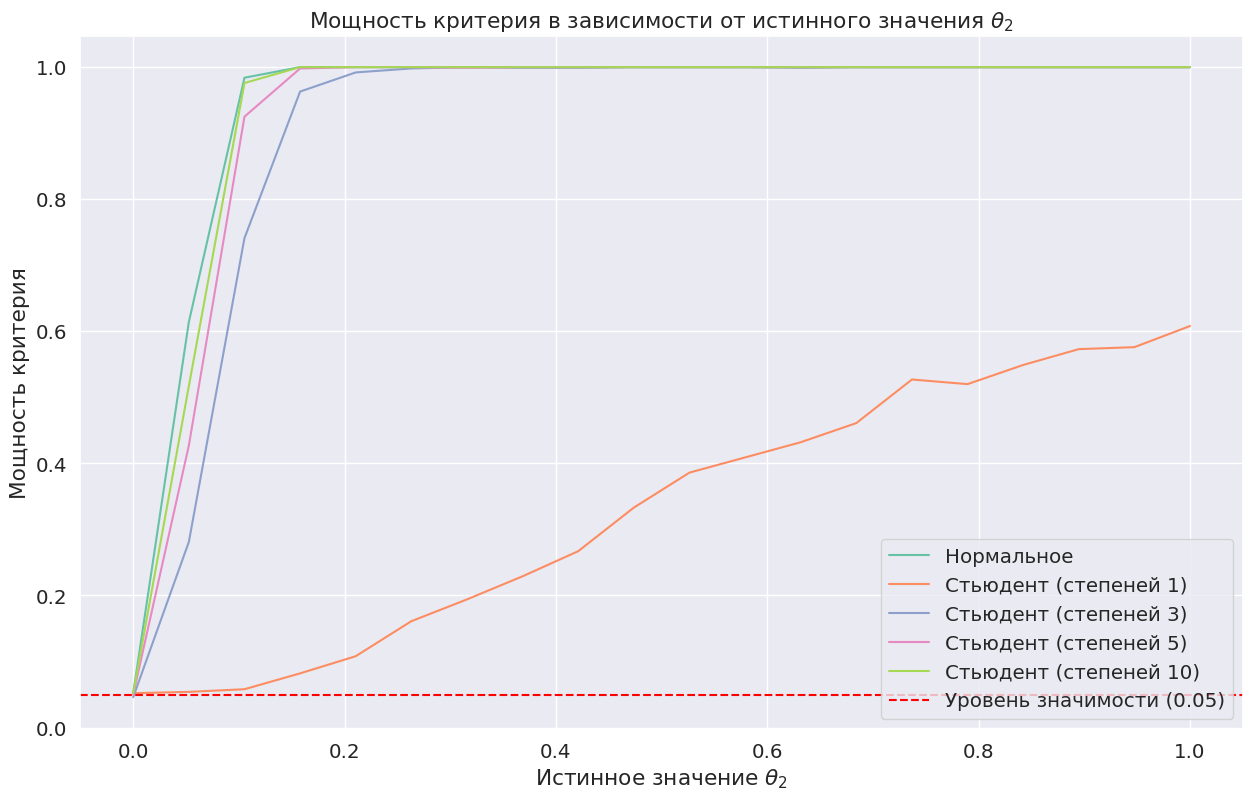

In [22]:
plt.figure(figsize=(15, 9))
for df, power_values in results.items():
    label = "Нормальное" if df is None else f"Стьюдент (степеней {df})"
    plt.plot(theta_2_values, power_values, label=label)

plt.title("Мощность критерия в зависимости от истинного значения $\\theta_2$")
plt.xlabel("Истинное значение $\\theta_2$")
plt.ylabel("Мощность критерия")
plt.axhline(0.05, color='red', linestyle='--', label="Уровень значимости (0.05)")
plt.legend()
plt.grid(True)
plt.show()


**Вывод:**

1) Оценка вероятности ошибки I рода, полученная в ходе симуляций, близка к заданному уровню значимости, что подтверждает корректность используемого теста (при нужных предположениях о шуме)
2) Хоть шум может и не быть гомоскедастичным или распределенным нормально - иногда приближение самой модели гауссовской остается верным. Например если нет сильных выбросов, распределение близко к нормальному (проблема наблюдает только при совсем маленьком числе степеней свободы, что видно на графике мощностей)
3) Так же роль играет то, что тест достаточно устойчив к таким изменениям шума, поэтому сильных отклонений мы не получили.
4) Чем больше значение параметра theta_2 тем выше мощности. Что логично, потому что такое значимое различие заметить проще.